# Machine Learning Engineer Nanodegree
## Projekt: Vorhersage von Hauspreisen in Boston
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. 
A model trained on this data could then be used to make predictions like monetary value about a home. 
This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

## 1. Daten erheben


The dataset for this project originates from the [UCI Machine Learning Repository].
For the purposes of this project, some preprocessing steps have been made to the dataset.
1. We need to separate the dataset into **features** and the **target variable** and store these. 

 -- **Feature 1** `'RM'` is the average number of rooms among homes in the neighborhood.

 -- **Feature 2** `'LC_PER'` is the percentage of "lower class" homeowners in the neighborhood.

 -- **Feature 3** `'ST_RATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.
 
 -- The **target variable**, `'PRICE'`, is the price we seek to predict. 

In [5]:
# Pretty display for notebooks
%matplotlib inline 

# Load the Boston housing dataset
import pandas
data = pandas.read_csv('housing2.csv')
prices = data['PRICE']
features = data.drop('PRICE', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))
data.head()

Boston housing dataset has 489 data points with 4 variables each.


,RM,LC_PER,ST_RATIO,PRICE
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


## Daten - Statistik zum Verständnis

In [6]:
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(prices.min())) 
print("Maximum price: ${}".format(prices.max()))
print("Mean price: ${}".format(prices.mean()))
print("Median price ${}".format(prices.median()))
print("Standard deviation of prices: ${}".format(prices.std()))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165340.27765266786


# Frage 1 - Feature Beobachtung

** Intuitiv für die drei obigen Features: Denkt ihr, dass ein Anstieg in dem jeweiligen Feature zu einem **Anstieg** im Wert von `'PRICE'` oder einer **Abnahme** in dem Wert von `'PRICE'` führen würde? **
Welches der drei Features glaubt ihr hat den stärksten Einfluss auf `'PRICE'`?

----

## 2. Ein Model auswählen


### Definiere eine Performanz-Kennzahl
Die Werte von R<sup>2</sup> reichen von 0 bis 1, was den Prozentsatz der quadrierten Corelation zwischen vorhergesagtem und tatsächlichen Werte der **Zielvariable** misst. Ein Model mit einem R<sup>2</sup>-Wert von 0 ist nicht besser als das Modell, das immer den *Durchschnitt* von der Zielvariable vorhersagt, während ein Model mit einem R<sup>2</sup>-Wert von 1 perfekt die Zielvariable vorhersagt. Ein Wert zwischen 0 und 1 zeigt an, welcher Prozentsatz der Zielvariable durch die **Features** erklärt werden kann. 

In [7]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

### 3. Einen Entscheidungsbaum-Regressor trainieren

In [8]:
# Shuffle and split the data into 80% training and 20% testing subsets
# Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

----

## Analyzing Model Performance


### Learning Curves


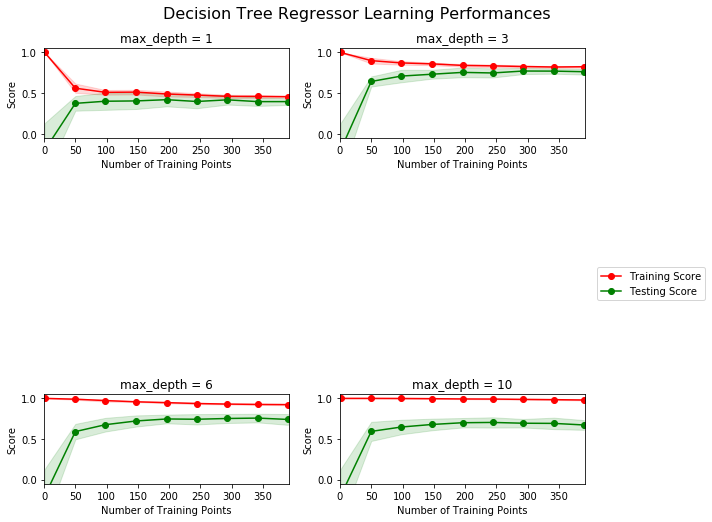

In [9]:
# Import supplementary visualizations code visuals.py
import visuals
#Produce learning curves for varying training set sizes and maximum depths
visuals.ModelLearning(features, prices)

### Complexity Curves


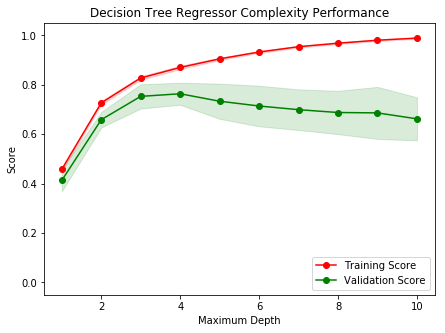

In [10]:
visuals.ModelComplexity(X_train, y_train)

-----

## Evaluating Model Performance

### Question 7 - Grid Search
* What is the grid search technique?

**Answer: ** A model like the Decision Tree model can depend on multiple parameter. The grid search technique computes a chosen score for each parameter combination and finally chooses the parameter combination with the highest score for the model.

### Implementation: Fitting a Model

In [11]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
# The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, 
#and for each shuffle, 20% ('test_size') of the data will be used as the validation set.
from sklearn.cross_validation import ShuffleSplit

def fit_model(X, y):

    regressor = DecisionTreeRegressor()
    params = {'max_depth':range(1,10)}
    
    scoring_fnc = make_scorer(performance_metric)
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model

In [12]:
# Fit the training data to the model using grid search
regressor = fit_model(X_train, y_train)

In [13]:
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(regressor.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [14]:
print("The importances of the features ",(list(features.columns))," are ",((regressor.feature_importances_)),", respectively.")

The importances of the features  ['RM', 'LC_PER', 'ST_RATIO']  are  [0.31159906 0.65587471 0.03252623] , respectively.


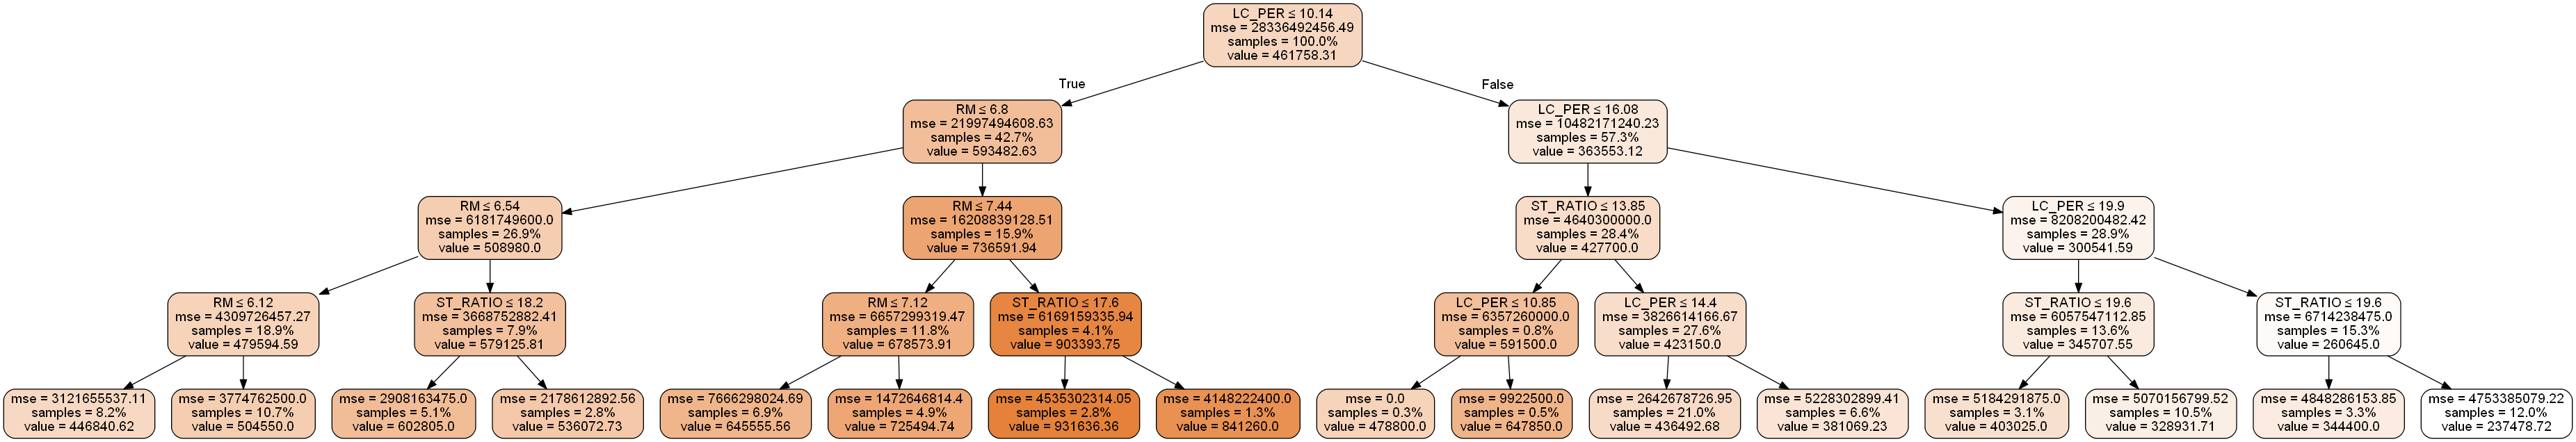

In [15]:
#Visualize the Decision Tree Regressor
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, feature_names = list(features.columns),
                class_names = regressor.classes_,#iris.target_names,
                proportion = True, precision = 2, filled = True,
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Vorhersagen
### Frage 3 - Kaufpreise vorhersagen
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. 

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 

In [17]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(regressor.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [13]:
visuals.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: ** I think some data may have changed a lot since 1978. In particular, the chosen features neighborhood poverty levels and student-to-teacher ratios may have changed in the past 40 years. This may have a great influence on different prices of the homes today. And of course inflation should lead to an increase in today's Boston house prices.
I also think that the three features do not suffice to describe a home. It would be better to also include e.g. square feet, presence of pool or infrastructure quality. Including these further features would not make the model too complex or overfitting.
The chosen model further seems to be okay robust as Client 1's predicted home prices have an okay range of USD 69,044.61. The predicted values of the Client homes from Question 9 fit to calculated statistics on the dataset.
Though the home situation is very different in a city like Boston compared to a rural city, I think that the chosen three features might also be useful for models for rural cities. But surely the prices in Boston are higher, so that should be taken into consideration if the dataset would be used for a rural city.
Finally, I do think that the characteristics of an entire neighborhood has a great influence on a house price so that should indeed play a great role.

Summing up, due to the outdated dataset the model should rather not be used in a real-world setting even though the chosen model does a good job given that it only takes three features into consideration.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.